In [5]:
pip install panda

Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt , date

In [9]:
hospital_data = pd.read_excel('HospitalDatabase.xlsx')
hospital_data.tail()

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language
940,941,Wat,Fideler,1986-05-26 00:01:19.761,Male,Black/African-American,English
941,942,Wandie,Baythrop,1970-06-10 21:41:03.814,Male,Black/African-American,English
942,943,Diahann,Smeeton,1983-01-08 21:49:27.884,Male,Black/African-American,English
943,944,Panchito,Sharple,1963-06-05 07:57:05.569,Male,Black/African-American,English
944,945,Walsh,Calvie,1972-08-06 03:40:03.454,Male,Black/African-American,English


In [17]:
hospital_data = pd.read_excel('HospitalDatabase.xlsx','Patients')
hospital_data.head()

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English


# 21.Which reason of visit has maximum mortality rate.

In [25]:
df = pd.read_excel("HospitalDatabase.xlsx", sheet_name=["Patients","EDVisits","AmbulatoryVisits","ReAdmissionRegistry","Discharges","Providers","EDUnique"])

In [26]:
#dataframes used 
readmission_reg=df['ReAdmissionRegistry']
EDuniq=df['EDUnique']

In [27]:
#joining the dataframes
df_inner= pd.merge(readmission_reg,EDuniq, on='PatientID', how='inner')
type(df_inner)
df_inner.head()

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag,EDVisitID,VisitDate,EDDischargeTime,Acuity,ReasonForVisit,EDDisposition
0,389,1,2018-01-01,2018-01-04 19:59:31.391,Home,Hospitalist,Kidney Failure,6.717771,0.010046,NaN,NaN,NaN,1,2020-01-01 00:00:00.000,2020-01-01 11:20:22.924,1,Stomach Ache,Admitted
1,635,2,2018-01-01,2018-01-04 21:28:51.898,Home,General Medicine,Flu,3.825969,0.604562,1.0,2.0,1.0,2,2020-01-01 00:00:40.339,2020-01-01 11:46:34.398,1,Migraine,Discharged
2,606,3,2018-01-01,2018-01-04 22:28:23.672,Home,General Medicine,Flu,3.382493,0.266137,1.0,3.0,1.0,55,2020-01-01 15:01:29.846,2020-01-01 23:11:53.864,3,Migraine,admitted
3,587,5,2018-01-01,2018-01-05 05:47:04.933,Home,General Medicine,Flu,3.763352,0.307527,1.0,4.0,1.0,5,2020-01-01 00:38:15.540,2020-01-01 13:19:43.485,1,Fever,Discharged
4,640,6,2018-01-01,2018-01-05 14:18:30.029,Home,ICU,Heart Failure,13.650953,0.408898,NaN,NaN,NaN,6,2020-01-01 00:39:22.945,2020-01-01 05:16:35.323,1,Fever,Discharged


In [28]:
#Grouping the data where dischargedisposition is "Expired"

In [29]:
new_df=df_inner[df_inner.DischargeDisposition=='Expired']
new_df.head()

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag,EDVisitID,VisitDate,EDDischargeTime,Acuity,ReasonForVisit,EDDisposition
7,1,9,2018-01-01,2018-01-07 18:06:06.408,Expired,Cardiology,AMI,9.646857,0.061540,NaN,NaN,1.0,100,2020-01-02 01:42:21.609,2020-01-03 01:01:59.804,4,Shortness of Breath,admitted
29,178,26,2018-02-02,2018-02-14 20:03:29.280,Expired,Hospitalist,Flu,6.306908,0.620570,NaN,NaN,1.0,26,2020-01-01 06:14:46.240,2020-01-01 15:34:00.868,5,Chest Pain,Admitted
98,257,93,2018-01-06,2018-01-18 02:59:04.667,Expired,Cardiology,Broken Leg,6.816558,0.628827,NaN,NaN,1.0,184,2020-01-03 02:52:59.647,2020-01-03 11:02:00.183,1,Fever,Discharged
106,152,101,2018-01-07,2018-01-11 16:16:06.782,Expired,Cardiology,Kidney Failure,6.580273,0.573887,NaN,NaN,1.0,192,2020-01-03 05:06:23.929,2020-01-03 16:27:48.524,2,Migraine,Admitted
107,361,102,2018-01-07,2018-01-15 04:48:33.134,Expired,Cardiology,Afib,12.794536,0.222163,NaN,NaN,1.0,193,2020-01-03 05:27:19.166,2020-01-04 04:53:48.392,3,Stomach Ache,Admitted


In [30]:
#getting the count of patientid by Grouping the data based on Reason of visit and discharge disposition.

In [31]:
max_mortality=new_df.groupby(['ReasonForVisit','DischargeDisposition'])['PatientID'].count().reset_index()
end_result=max_mortality.rename(columns={'PatientID':'Count_of_patients'})
print(end_result[end_result.Count_of_patients == end_result.Count_of_patients.max()])

  ReasonForVisit DischargeDisposition  Count_of_patients
4          Fever              Expired                 22


# 22.Display the average LOS based on Service and Discharge Disposition(Maintain the column Hierarchy).


In [73]:
#read the dataframe
hospital_data=pd.read_excel('HospitalDatabase.xlsx','Discharges')
df = pd.DataFrame(hospital_data)

pv = df.pivot_table(index=['Service','DischargeDisposition'],
                    values=['ExpectedLOS'],
                    aggfunc='mean')
                         
print(pv)

                                       ExpectedLOS
Service          DischargeDisposition             
Cardiology       Expired                  9.202626
                 Home                    12.864936
                 Transfer                11.818403
General Medicine Expired                  5.874003
                 Home                     6.105696
                 Transfer                 6.116124
Hospitalist      Expired                  6.775636
                 Home                     8.009046
                 Transfer                 5.701389
ICU              Expired                  9.919063
                 Home                    13.451158
                 Transfer                11.989238
Neurology        Expired                  9.384312
                 Home                    12.538859
                 Transfer                11.469198
Orthopeadics     Expired                  3.943883
                 Home                     3.508337
                 Transfer      

In [ ]:
#Attempt 2 

In [72]:
#read the dataframe
hospital_data=pd.read_excel('HospitalDatabase.xlsx','Discharges')
df = pd.DataFrame(hospital_data)

#Create a pivot table to display the average LOS by Service and Discharge Disposition
pivot = pd.pivot_table(df, values='ExpectedLOS', index=['Service'], columns=['DischargeDisposition'], aggfunc='mean')

# Display the pivot table
print(pivot)

DischargeDisposition   Expired       Home   Transfer
Service                                             
Cardiology            9.202626  12.864936  11.818403
General Medicine      5.874003   6.105696   6.116124
Hospitalist           6.775636   8.009046   5.701389
ICU                   9.919063  13.451158  11.989238
Neurology             9.384312  12.538859  11.469198
Orthopeadics          3.943883   3.508337   4.842255


# 23.Add column 'Age' in Patient table.


In [33]:
#data frame
patients=df['Patients']

In [34]:
#define now parameter
now = pd.to_datetime('now')

/Users/shub/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


In [35]:
#calculate Age
patients['Age']=(now - patients['DateOfBirth']).astype('<m8[Y]') 
patients.head()

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Age
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English,63.0
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English,37.0
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English,46.0
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English,54.0
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English,60.0


# 24.Using arrays and loops, find the count of patients based on gender.


In [37]:
#dataframe
patients=df['Patients']
readmission_reg=df['ReAdmissionRegistry']

In [38]:
#copy the contents of patientid and gender to another dataframe.
discharge_date=readmission_reg[['DischargeDate']].copy()
pantient_df=patients[['PatientID','Gender']].copy()

In [39]:
#create an array for each column patientID & Gender.
array_patientID=pantient_df['PatientID'].to_numpy()
array_gender=pantient_df['Gender'].to_numpy()

In [40]:
#creating a dictionary with the above 2 arrays.
patient_dict=dict(zip(array_patientID,array_gender))

In [44]:
#Function to calculating the count of male & female using arrays & loops.
countMale=0
countFemale=0
for x in patient_dict:
    if patient_dict[x]=='Male':
        countMale+= 1
    else:
        countFemale+=1
print(f"Male count- {countMale}, Female count- {countFemale}")

Male count- 537, Female count- 408


# 25.Create bins to segregate Patients with 'Mild Hypertension', 'Moderate',  'High Hypertension' ,'Severe Hypertension'. Create a new column to show your analysis.

In [74]:
df=pd.read_excel('HospitalDatabase.xlsx','AmbulatoryVisits')

In [76]:
def assign_hypertension_category(row):
    if row['BloodPressureSystolic'] < 120 and row['BloodPressureDiastolic'] < 80:
        return 'Normal'
    elif 120 <= row['BloodPressureSystolic'] <= 139 or 80 <= row['BloodPressureDiastolic'] <= 89:
        return 'Mild'
    elif 140 <= row['BloodPressureSystolic'] <= 159 or 90 <= row['BloodPressureDiastolic'] <= 99:
        return 'Moderate'
    else:
        return 'Severe Hypertension'

df['HypertensionCategory'] = df.apply(assign_hypertension_category, axis=1)
df.head()

,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus,HypertensionCategory
0,202,840,29,2019-03-19,2019-03-13 07:59:24.000,10,Physical,188.0,144.143427,83.044920,No Show,Severe Hypertension
1,436,820,25,2019-03-19,2019-02-24 07:10:31.043,3,Follow Up,179.0,118.876808,90.309544,No Show,Severe Hypertension
2,794,879,30,2019-04-02,2019-03-19 01:41:55.656,11,Telemedicine,133.0,98.749563,80.859776,No Show,Mild
3,799,884,37,2019-03-03,2019-02-25 01:25:39.696,4,Telemedicine,132.0,98.001270,82.184737,No Show,Mild
4,515,32,26,2019-03-16,2019-02-20 06:44:59.617,11,Telemedicine,131.0,85.115632,89.192362,No Show,Mild


In [80]:
#Using cut

In [78]:
# define the bin edges and labels for the systolic blood pressure column
bins = [0, 120, 140, 160, 200]
labels = ['Mild Hypertension', 'Moderate Hypertension', 'High Hypertension', 'Severe Hypertension']

# use pandas cut() function to create a new column with the bin labels
df['BP Category'] = pd.cut(df['BloodPressureSystolic'], bins=bins, labels=labels, include_lowest=True)

# display the first 10 rows of the DataFrame with the new column
df.head(10)

,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus,HypertensionCategory,BP Category
0,202,840,29,2019-03-19,2019-03-13 07:59:24.000,10,Physical,188.0,144.143427,83.044920,No Show,Severe Hypertension,Severe Hypertension
1,436,820,25,2019-03-19,2019-02-24 07:10:31.043,3,Follow Up,179.0,118.876808,90.309544,No Show,Severe Hypertension,Severe Hypertension
2,794,879,30,2019-04-02,2019-03-19 01:41:55.656,11,Telemedicine,133.0,98.749563,80.859776,No Show,Mild,Moderate Hypertension
3,799,884,37,2019-03-03,2019-02-25 01:25:39.696,4,Telemedicine,132.0,98.001270,82.184737,No Show,Mild,Moderate Hypertension
4,515,32,26,2019-03-16,2019-02-20 06:44:59.617,11,Telemedicine,131.0,85.115632,89.192362,No Show,Mild,Moderate Hypertension
5,809,894,31,2019-03-13,2019-02-28 10:28:01.091,2,Physical,121.0,57.692485,60.402573,No Show,Mild,Moderate Hypertension
6,491,875,23,2019-01-09,2019-01-08 03:49:56.264,6,Follow Up,175.0,132.883861,55.000807,No Show,Severe Hypertension,Severe Hypertension
7,194,832,11,2019-03-11,2019-03-03 15:38:54.164,2,Telemedicine,177.0,146.238936,59.087923,No Show,Severe Hypertension,Severe Hypertension
8,811,896,23,2019-03-15,2019-03-11 05:04:41.511,4,Physical,140.0,74.519839,85.051919,No Show,Moderate,Moderate Hypertension
9,726,878,16,2019-04-04,2019-03-10 15:52:39.962,9,Telemedicine,183.0,122.982498,68.800091,No Show,Severe Hypertension,Severe Hypertension


# 26.Plot a graph to show the distribution of expected mortality.

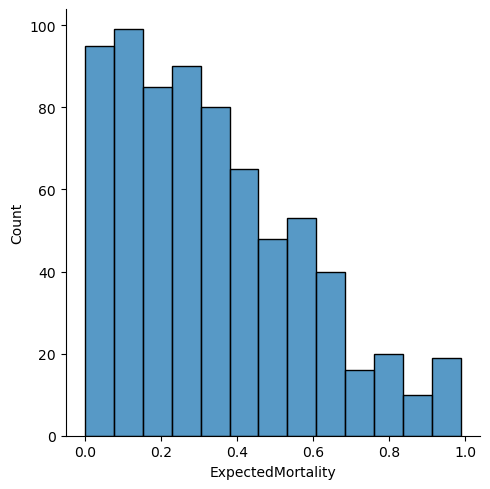

In [4]:
df = pd.read_excel('HospitalDatabase.xlsx','Discharges')
sns.displot(data=df, x="ExpectedMortality")

# 27.Which departmentID has maximum number of visits scheduled.


In [9]:
av = pd.read_excel('HospitalDatabase.xlsx','AmbulatoryVisits')

In [10]:
print(av.groupby('VisitDepartmentID')['VisitID'].count())


VisitDepartmentID
1      51
2      51
3      51
4      51
5      92
6      92
7      93
8      93
9      79
10    100
11    102
12     95
Name: VisitID, dtype: int64


In [28]:
print("DepartmentID with maximum number of visits scheduled:- ",(av.groupby('VisitDepartmentID')['VisitID'].count().max()))
print ("The departmentID with maximum number of visits scheduled:- " +str(av.loc[av['VisitDepartmentID'].max(),'VisitDepartmentID']))


DepartmentID with maximum number of visits scheduled:-  102
The departmentID with maximum number of visits scheduled:- 11


# 28.Find the visit type with maximum 'No Show'.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
#read Excel file 
hospital_data=pd.read_excel('HospitalDatabase.xlsx','AmbulatoryVisits')


df_group1=hospital_data.groupby(["VisitStatus","VisitType"])["PatientMRN"].count()

print(df_group1)
print("Maximum number of 'No shows' is in type 'Telemedicine' with 74")


VisitStatus  VisitType   
Canceled     Follow Up        29
             New               5
             Physical         11
             Telemedicine     15
Completed    Follow Up       266
             New             120
             Physical        155
             Telemedicine    195
No Show      Follow Up        41
             Physical         39
             Telemedicine     74
Name: PatientMRN, dtype: int64
Maximum number of 'No shows' is in type 'Telemedicine' with 74


# 29.Which demographic patients are prone to get stroke?

In [61]:
hospital_data = 'HospitalDatabase.xlsx'
Patients = pd.read_excel(hospital_data,sheet_name='Patients')
Discharges = pd.read_excel(hospital_data,sheet_name='Discharges')

demog=pd.merge(Patients,Discharges,on='PatientID',how='inner')
strokedf=demog[demog["PrimaryDiagnosis"]==("Stroke")]
demog2 = strokedf.groupby(['Race','Gender'])

print(demog2["PatientID"].count())
print("This shows that African American Male are more prone to stroke based on the dataset")


Race                    Gender
Black/African-American  Female    17
                        Male      23
White                   Female    19
                        Male       9
Name: PatientID, dtype: int64
This shows that African American Male are more prone to stroke based on the dataset


# 30.Using loc,get the details of the providers where providerid is between 11 and 20 and providerSpecialty is Surgery.

In [38]:
#read hospital dataset - Providers
hospital_data=pd.read_excel('HospitalDatabase.xlsx','Providers')

In [39]:
hospital_data[hospital_data.ProviderSpecialty == 'Surgery'].loc[10:19]

,ProviderID,ProviderName,ProviderSpecialty,ProviderDateOnStaff
10,11,Kim Kimberly,Surgery,1998-05-10 14:47:29.468
11,12,Sarah Ab,Surgery,1998-08-18 05:22:40.762
12,13,Abigail Marriot,Surgery,1998-11-08 12:25:45.705
13,14,Dave Yu,Surgery,1999-06-26 16:18:57.436
14,15,Christian Saint,Surgery,2000-08-27 00:12:40.326
15,16,Perry Pardon,Surgery,2001-02-13 11:49:17.862


# 31.If patient's gender is Female, add Ms.to the name and for male patients add Mr. to the name.

In [40]:
df = 'HospitalDatabase.xlsx'
Patients_df = pd.read_excel(df,sheet_name='Patients')

# condition
male = (Patients_df['Gender'] == 'Male')
female = (Patients_df['Gender'] == 'Female')

#add string
Patients_df.loc[male, 'FirstName'] = 'Mr. ' + Patients_df['FirstName'].astype(str)
Patients_df.loc[female, 'FirstName'] = 'Ms. ' + Patients_df['FirstName'].astype(str)

print(Patients_df.loc[male, 'FirstName'])
print(Patients_df.loc[female, 'FirstName'])


0         Mr. Lanni
1           Mr. Far
2       Mr. Devlin 
3       Mr. Carmine
4         Mr. Tann 
           ...     
940         Mr. Wat
941      Mr. Wandie
942     Mr. Diahann
943    Mr. Panchito
944       Mr. Walsh
Name: FirstName, Length: 537, dtype: object
25        Ms. Sally
26         Ms. Mike
27       Ms. Jordan
28          Ms. Ted
29          Ms. Ala
           ...     
914    Ms. Jerrilyn
915      Ms. Kaylil
916      Ms. Velvet
917        Ms. Kiri
918    Ms. Champlin
Name: FirstName, Length: 408, dtype: object


# 32.Create a pie chart by taking Service= ["ICU", "Neurology", "General", "Medicine"] & ExpectedLOS=[10,5,7,9] & explode the wedge with highest LOS.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

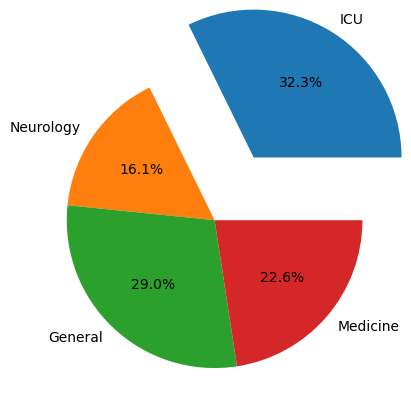

In [4]:
#assigning values to array

y=np.array(['10','5','9','7'])
mylabels = ["ICU", "Neurology", "General", "Medicine"]
myexplode = [0.5,0,0,0]

#piechart
plt.pie(y, labels = mylabels,explode = myexplode,autopct ="%.1f%%")
plt.show()

# 33.Plot a graph to show the distribution of expected length of stay.

In [12]:
df = pd.read_excel('HospitalDatabase.xlsx','ReAdmissionRegistry')
var_new= df[['ExpectedLOS']]

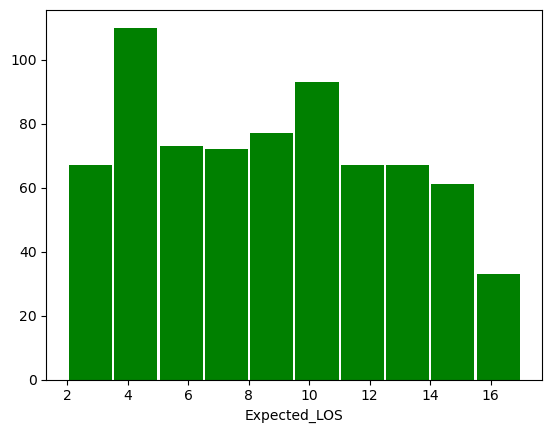

In [19]:
#plotting Histogram.

plt.hist(var_new, bins=10, rwidth=0.95, color='g')
plt.xlabel('Expected_LOS')
plt.ylabel=('Count of Expected LOS')
plt.title=('Distribution of Expected LOS')
plt.show()

# 34.Create a WordCloud Chart with Reason For Visit.


In [64]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


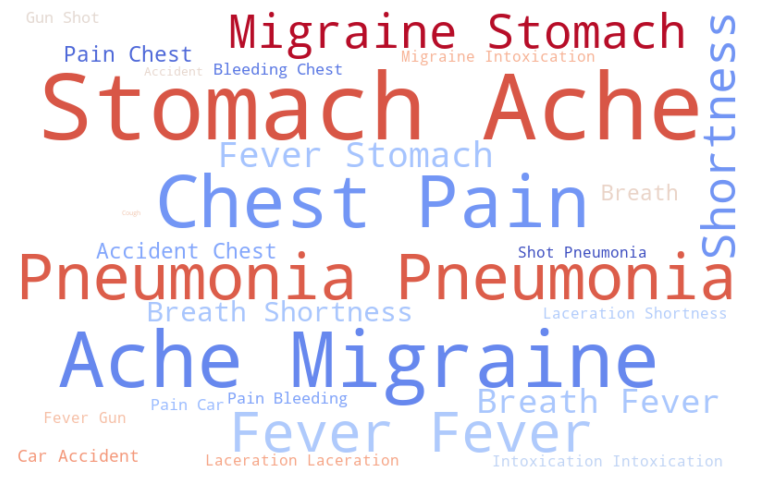

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Read in the data from the file
df = pd.read_excel('HospitalDatabase.xlsx','EDVisits')

# Concatenate all the reason for visit strings into one long string
text = ' '.join(df['ReasonForVisit'].dropna())

# Create the word cloud object and generate the word cloud
wordcloud = WordCloud(width=800, height=500, background_color='white', colormap='coolwarm').generate(text)

# Display the word cloud
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# 35.np.arange(1,31).reshape(6,5), find array slicing to get the elements 4,5,24,25,29,30. When the value is less than 6, print as -1,else print 99.

In [54]:
import numpy as np

my_array = np.arange(1,31).reshape(6,5)
result = my_array[[0,0,4,4,5,5],[3,4,3,4,3,4]]
print("Sliced elements:",result)

for element in result:
    if element < 6:
        print (-1)
    else:
        print (99)
    
    

Sliced elements: [ 4  5 24 25 29 30]
-1
-1
99
99
99
99


# 36.Retrieve the count of patients who are prone to hypertension crisis. (SBP>180 & DBP>120)

In [56]:
import pandas as pd
df = pd.read_excel('HospitalDatabase.xlsx','AmbulatoryVisits')
# Calculate the number of patients who have both SBP > 180 and DBP > 120
count_hypertensive = ((df['BloodPressureSystolic'] > 180) & (df['BloodPressureDiastolic'] > 120)).sum()

# Print the number of patients who are prone to hypertension crisis
print("Number of patients who are prone to hypertension crisis:", count_hypertensive)

Number of patients who are prone to hypertension crisis: 101


# 37.Display the data where actual LOS is greater than expected LOS.

In [20]:
df = pd.read_excel("HospitalDatabase.xlsx",'Discharges')
df['ActualLOS']= (df['DischargeDate']-df['AdmissionDate']).dt.days
df.loc[df['ActualLOS'] > df['ExpectedLOS']]

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ActualLOS
1,257,93,2018-01-06,2018-01-18 02:59:04.667,Expired,Cardiology,Broken Leg,6.816558,0.628827,12
4,258,103,2018-01-07,2018-01-15 13:32:36.157,Expired,Cardiology,Broken Leg,2.639297,0.055468,8
5,395,109,2018-01-07,2018-01-22 17:57:37.103,Expired,Cardiology,Flu,2.981758,0.192976,15
6,396,115,2018-01-08,2018-01-17 02:19:05.623,Expired,Cardiology,Flu,4.959098,0.254923,9
7,259,116,2018-01-08,2018-01-20 03:40:53.605,Expired,Cardiology,Broken Leg,2.279624,0.491274,12
...,...,...,...,...,...,...,...,...,...,...
712,703,703,2018-02-21,2018-02-27 08:53:38.211,Transfer,General Medicine,Pneumonia,3.539165,0.275691,6
713,709,708,2018-02-21,2018-03-01 05:59:22.116,Transfer,General Medicine,Diabetes,4.518876,0.455570,8
714,697,713,2018-02-21,2018-03-04 00:23:19.967,Transfer,General Medicine,Pneumonia,8.542970,0.201036,11
715,715,716,2018-02-21,2018-03-06 03:31:05.262,Transfer,ICU,Heart Failure,11.362095,0.370695,13


# 38.Using loc, retrieve the firstname and lastname of patients between indices 101 and 200.

In [28]:
df=pd.read_excel('HospitalDatabase.xlsx','Patients')
df.loc[101:200,['FirstName','LastName' ]]

,FirstName,LastName
101,Gipsy,Frankton
102,Jethro,Wharin
103,Viv,Aylward
104,Swift,Dreschler
105,Fadel,Jacquemard
...,...,...
196,Noam,Laguerre
197,Arie,Bayless
198,Janaye,O'Mohun
199,Fonz,Group


# # 39.Delete the column 'DischargeDispostion' iteratively.

In [36]:
# #print the dataframe with DischargeDispostion column.

df=pd.read_excel('HospitalDatabase.xlsx','Discharges')
print("Original Data frame:\n")
print(df)

#print the dataframe with after delete DischargeDispostion column.

df.pop('DischargeDisposition')
print("\nData frame after deleting the column 'DischargeDisposition':\n")
df

Original Data frame:

     AdmissionID  PatientID AdmissionDate           DischargeDate  \
0              1          9    2018-01-01 2018-01-07 18:06:06.408   
1            257         93    2018-01-06 2018-01-18 02:59:04.667   
2            152        101    2018-01-07 2018-01-11 16:16:06.782   
3            361        102    2018-01-07 2018-01-15 04:48:33.134   
4            258        103    2018-01-07 2018-01-15 13:32:36.157   
..           ...        ...           ...                     ...   
715          715        716    2018-02-21 2018-03-06 03:31:05.262   
716          698        723    2018-02-22 2018-02-26 15:09:02.584   
717          704        724    2018-02-22 2018-02-27 07:59:32.385   
718          716        733    2018-02-22 2018-03-05 12:31:55.958   
719          710        742    2018-02-22 2018-03-10 20:38:30.568   

    DischargeDisposition           Service PrimaryDiagnosis  ExpectedLOS  \
0                Expired        Cardiology              AMI     9.646857 

,AdmissionID,PatientID,AdmissionDate,DischargeDate,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality
0,1,9,2018-01-01,2018-01-07 18:06:06.408,Cardiology,AMI,9.646857,0.061540
1,257,93,2018-01-06,2018-01-18 02:59:04.667,Cardiology,Broken Leg,6.816558,0.628827
2,152,101,2018-01-07,2018-01-11 16:16:06.782,Cardiology,Kidney Failure,6.580273,0.573887
3,361,102,2018-01-07,2018-01-15 04:48:33.134,Cardiology,Afib,12.794536,0.222163
4,258,103,2018-01-07,2018-01-15 13:32:36.157,Cardiology,Broken Leg,2.639297,0.055468
...,...,...,...,...,...,...,...,...
715,715,716,2018-02-21,2018-03-06 03:31:05.262,ICU,Heart Failure,11.362095,0.370695
716,698,723,2018-02-22,2018-02-26 15:09:02.584,ICU,Heart Failure,10.262312,0.812930
717,704,724,2018-02-22,2018-02-27 07:59:32.385,General Medicine,Pneumonia,6.036234,0.094128
718,716,733,2018-02-22,2018-03-05 12:31:55.958,ICU,Heart Failure,13.323413,0.490892


# 40.Create a jointplot on expected mortality & expected length of stay.

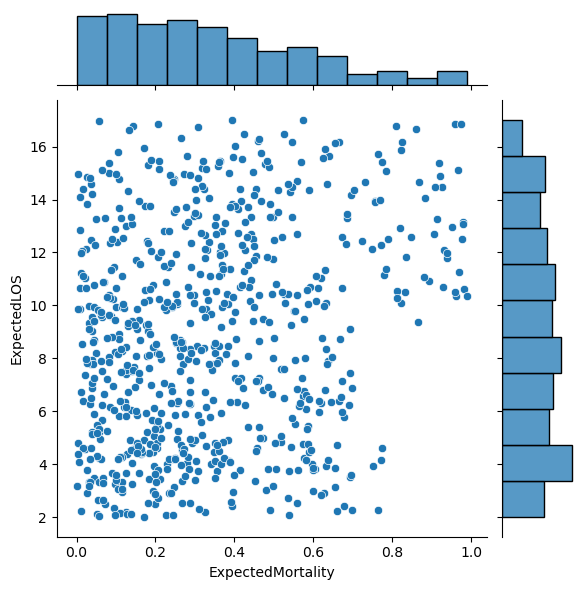

In [41]:
import seaborn as sns
df = pd.read_excel('HospitalDatabase.xlsx',sheet_name=None)
RR = df['ReAdmissionRegistry']
sns.jointplot(data=RR,x="ExpectedMortality",y="ExpectedLOS",kind="scatter")
plt.show()